In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)
import utility_functions

In [2]:
df = pd.read_csv("D:/Banque Misr Internship/Loan Datasets/final_dataset.csv")

In [3]:
import importlib
importlib.reload(utility_functions)

<module 'utility_functions' from 'd:\\Banque Misr Internship\\loan-defaulter-prediction\\Final Notebooks\\utility_functions.py'>

In [4]:
# # Split the data into features (X) and target (y)
# x = df.drop('TARGET', axis=1)
# y = df['TARGET']

In [5]:
# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [6]:
# adasyn = ADASYN(sampling_strategy='minority', random_state=42)
# X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

In [7]:
# X_train_res, X_val, y_train_res, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.3, random_state=42)

In [8]:
X_train_res,X_val,y_train_res,y_val,X_test,y_test = utility_functions.setup_model(df)

In [9]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred_tree = tree_model.predict(X_val)


In [11]:
utility_functions.calculate_metrics(y_val,y_pred_tree)

Accuracy: 0.9105
F1 Score: 0.9113
ROC-AUC Score: 0.9105


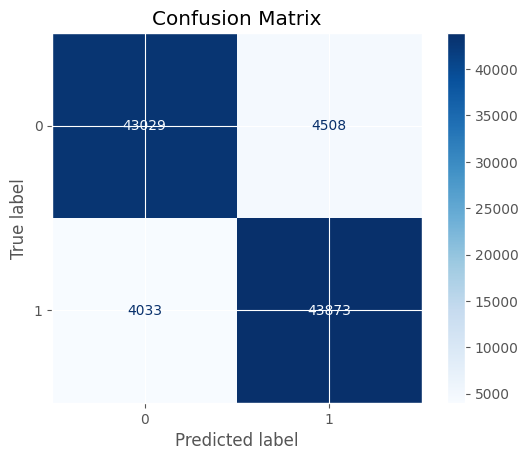

In [12]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_tree)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()